This file is associated with Lecture 27

# Graph Theory

## Basics of Graph Theory

In [4]:
# Load required packages
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Unweighted, Bidirectional Graph

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


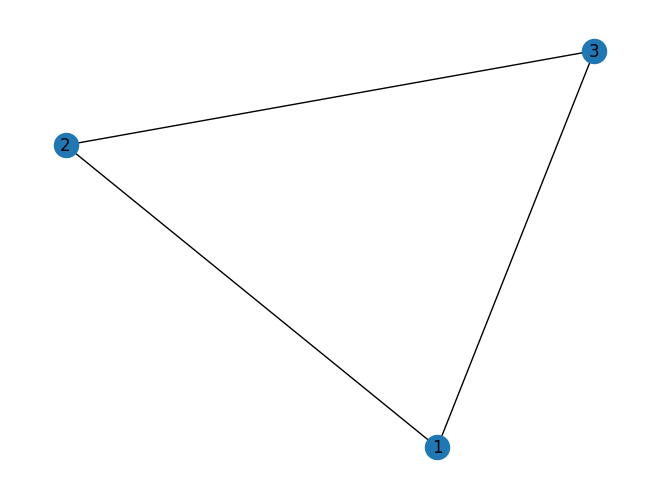

In [5]:
# Create a simple unweighted undirected graph and plot it
G_uu = nx.Graph()
G_uu.add_nodes_from([1, 2, 3])
G_uu.add_edges_from([(1, 2), (1, 3),(2,3)])
nx.draw(G_uu,with_labels=True)
print(nx.to_numpy_array(G_uu))

### Unweighted, Unidirectional Graph

[[0. 1. 1.]
 [0. 0. 1.]
 [0. 0. 0.]]


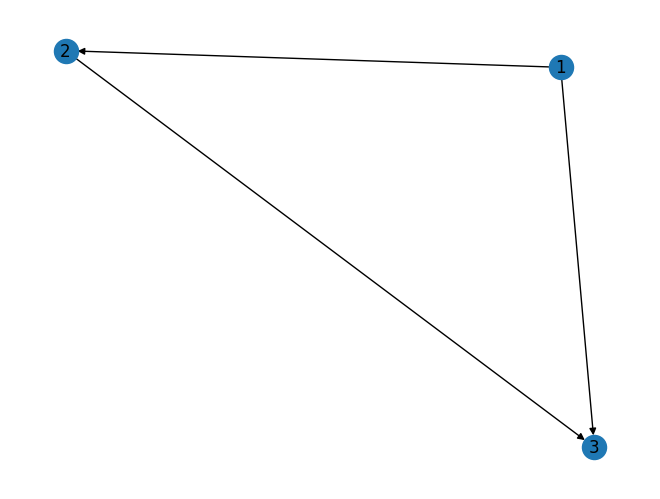

In [6]:
# Create a simple unweighted directed graph and plot it
G_ud = nx.DiGraph()
G_ud.add_nodes_from([1, 2, 3])
G_ud.add_edges_from([(1, 2), (1, 3),(2,3)])
nx.draw(G_ud,with_labels=True)
print(nx.to_numpy_array(G_ud))

### Weighted, Unidirectional Graph

[[0.  0.8 0.5]
 [0.  0.  0.4]
 [0.  0.  0. ]]


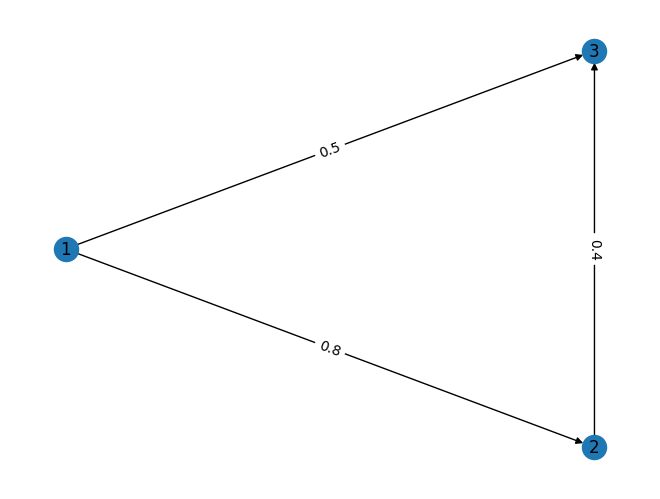

In [8]:
# Create a simple weighted directed graph and plot it
G_wd = nx.DiGraph()
G_wd.add_nodes_from([1, 2, 3])
G_wd.add_weighted_edges_from([(1, 2,0.8), (1, 3,0.5),
(2,3,0.4)])
pos = nx.shell_layout(G_wd)
nx.draw(G_wd,pos,with_labels=True)
labels = nx.get_edge_attributes(G_wd,'weight')
nx.draw_networkx_edge_labels(G_wd,pos,edge_labels=labels)
print(nx.to_numpy_array(G_wd))

### Connectivity Graph

[[0 1 1 1 1 1 0 1 1 0]
 [0 0 0 1 0 0 1 1 0 1]
 [1 1 0 0 1 0 1 1 0 1]
 [1 1 0 1 0 1 0 0 0 0]
 [1 1 1 0 1 1 1 0 1 0]
 [0 1 1 0 0 0 1 1 0 0]
 [1 0 0 1 0 1 1 0 0 1]
 [0 1 1 0 1 1 1 1 0 1]
 [0 0 1 1 0 0 1 1 0 0]
 [0 0 1 0 0 0 0 0 0 0]]
[[0.         0.         0.         0.         0.         0.
  0.42628062 0.         0.         0.52191546]
 [0.82926167 0.         0.56773987 0.         0.10831284 0.79010718
  0.         0.         0.47046446 0.        ]
 [0.         0.         0.         0.45861394 0.         0.47557771
  0.         0.         0.01687052 0.        ]
 [0.         0.         0.16837106 0.         0.29756291 0.
  0.29857565 0.7067976  0.49842273 0.30137385]
 [0.         0.         0.         0.50215011 0.         0.
  0.         0.11948556 0.         0.64956188]
 [0.02556698 0.         0.         0.8524933  0.655851   0.
  0.         0.         0.84392733 0.80547965]
 [0.         0.73409167 0.40622214 0.         0.66864365 0.
  0.         0.2314631  0.86661557 0.        ]
 [0.

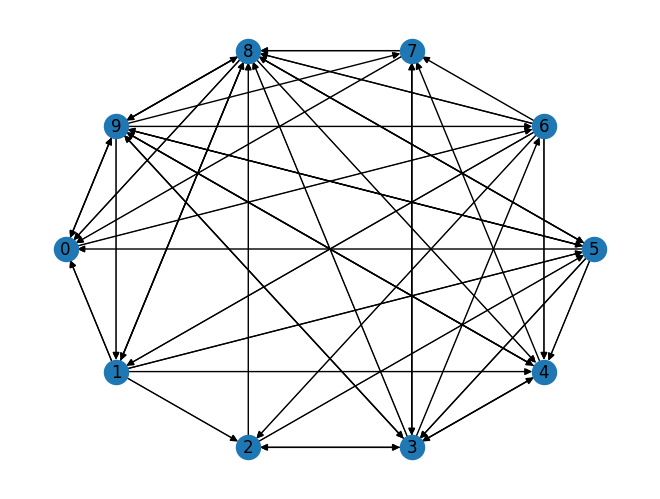

In [ ]:
# Create a weighted directed graph from a connectivity matrix and plot it.
RandMat = np.asmatrix(np.random.rand(10, 10))
np.fill_diagonal(RandMat, 0)
random_indices = np.random.randint(low=0, high=2, size=(10, 10))
print(random_indices)
RandMat[random_indices==1] = 0
G_wdr = nx.DiGraph()
G_wdr = nx.from_numpy_array(RandMat,create_using=nx.DiGraph())
widths = nx.get_edge_attributes(G_wdr, 'weight')
pos = nx.shell_layout(G_wdr)
nx.draw(G_wdr,pos,with_labels=True)
labels = nx.get_edge_attributes(G_wdr,'weight')
nx.draw_networkx_edges(G_wdr, pos,edgelist =
widths.keys(),width=list(widths.values()))
print(nx.to_numpy_array(G_wdr))

### Local Graph Measures

[13, 12, 11, 9, 9, 8, 8, 7, 7, 6]


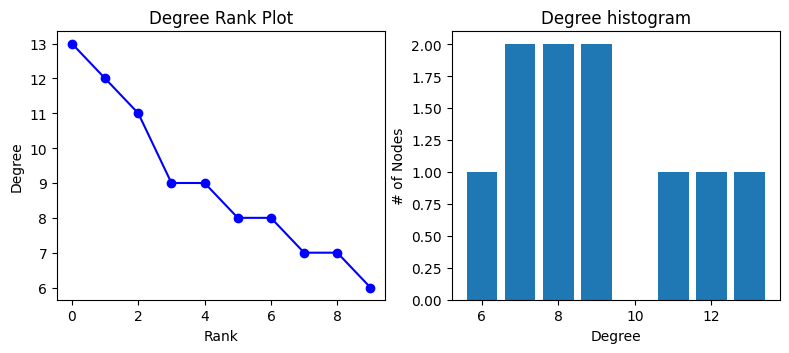

In [11]:
# Plot the degree distribution in the graph
degree_sequence = sorted((d for n, d in G_wdr.degree()), reverse=True)
print(degree_sequence)
dmin = min(degree_sequence)
dmax = max(degree_sequence)
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(5, 4)
ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")
ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
fig.tight_layout()
plt.show()

## Global Graph Measures

In [12]:
# Calculate the shortest path properties
print(nx.average_shortest_path_length(G_wdr))
print(nx.diameter(G_wdr))

1.5
2
